In [39]:
import geopandas,pandas

In [15]:
gd = geopandas.read_file("../../023中国2000-2018GDP/cngdp2000_2018.shp")

In [47]:
from libpysal.weights import Queen
from pysal.explore.esda import Geary,Moran

In [18]:
w = Queen.from_dataframe(gd)

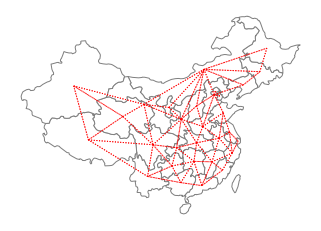

In [20]:
ax = gd.plot(edgecolor='grey', facecolor='w')
f,ax = w.plot(gd, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [24]:
Geary(y=gd["GDP2016"],w=w).C

0.6408697493444112

In [48]:
year,c,m = [],[],[]

In [49]:
for y in range(2000,2017):
    year.append(y)
    c.append(Geary(y=gd[f"GDP{y}"],w=w).C)
    m.append(Moran(y=gd[f"GDP{y}"],w=w).I)

<AxesSubplot:xlabel='year'>

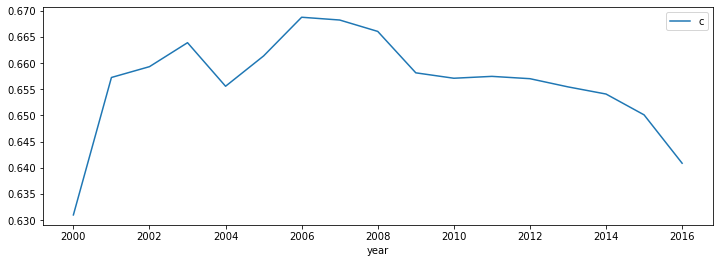

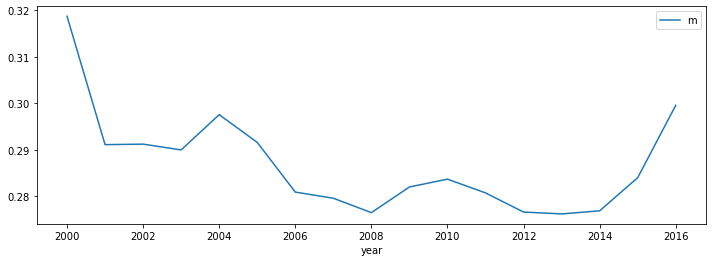

In [55]:
pandas.DataFrame({"c":c,"year":year}).plot(x="year",figsize=(12,4))
pandas.DataFrame({"m":m,"year":year}).plot(x="year",figsize=(12,4))